In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv("/kaggle/input/the-boston-houseprice-data/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]



In [5]:
#drop the columns with more than 50%null values
df.isnull().sum() / len(df)

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [6]:
#drop the high  and low cardanility features
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Text(0.5, 1.0, 'Distribution of housing prices in Boston')

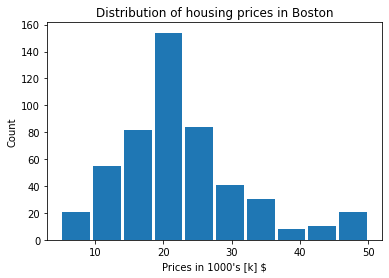

In [7]:
#fig, ax = plt.subplots(figsize = (15,6))
plt.hist(df["MEDV"], rwidth=0.9)
plt.xlabel("Prices in 1000's [k] $")
plt.ylabel("Count")
plt.title("Distribution of housing prices in Boston")

In [8]:
#lets check the corelation between the variable
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

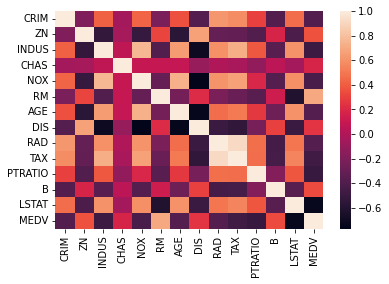

In [9]:
sns.heatmap(corr)

In [10]:
df[["CRIM", "MEDV"]].corr()

,CRIM,MEDV
CRIM,1.000000,-0.388305
MEDV,-0.388305,1.000000


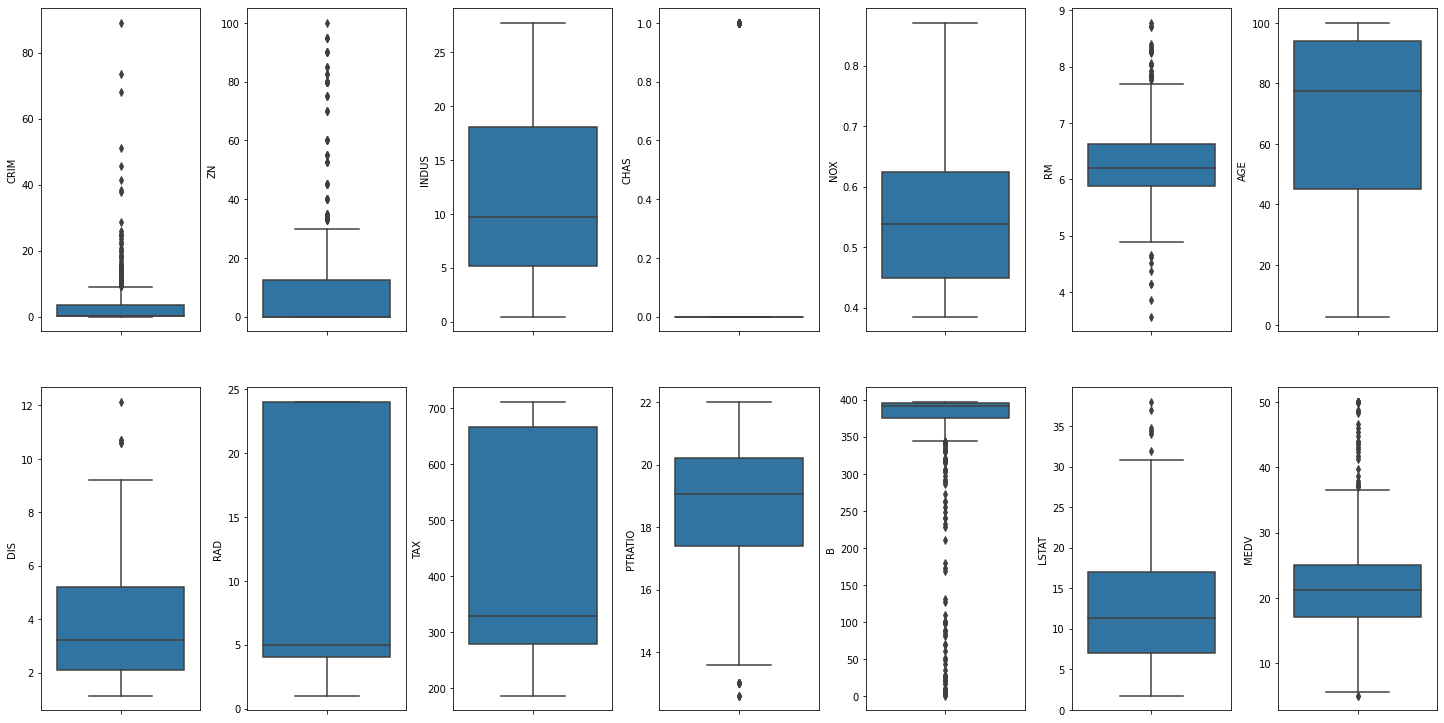

In [11]:
# find outliers using boxplot
boston_df_rows = 2
boston_df_cols = 7

fig, ax = plt.subplots(nrows = boston_df_rows, ncols=boston_df_cols, figsize = (20,10) )
index=0
ax= ax.flatten()
for col,value in df.items():
    sns.boxplot(data = df, y= col, ax = ax[index])
    index += 1
plt.tight_layout(pad = 0.5,w_pad =0.7 , h_pad =5)


<AxesSubplot:>

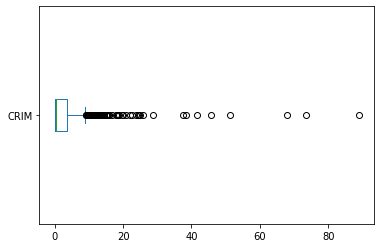

In [12]:
#Check the outliers
#sns.boxplot(df["CRIM"], vert=False)
df["CRIM"].plot(kind="box", vert=False)

In [13]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

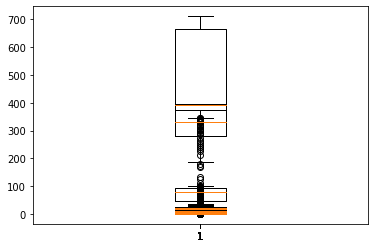

In [14]:
for col in df.columns:
    plt.boxplot(df[col])

In [15]:
# # Create a figure and a set of subplots
# fig, ax = plt.subplots(1, len(df.columns), figsize=(10, 5))

# # Loop through the columns and plot the boxplot for each column
# for i, col in df.columns:
#     df[col].plot(kind='box', ax=ax[i])

# # Show the plot
# #plt.show()

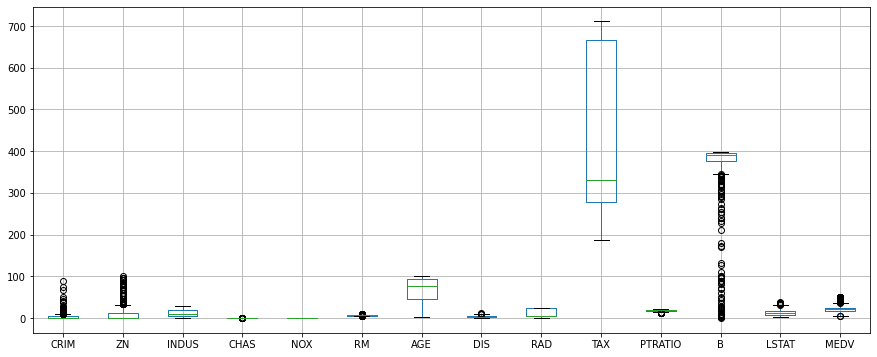

In [16]:
fig, ax = plt.subplots(figsize = (15,6))
df.boxplot(ax=ax)
plt.show()

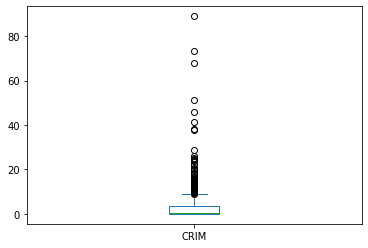

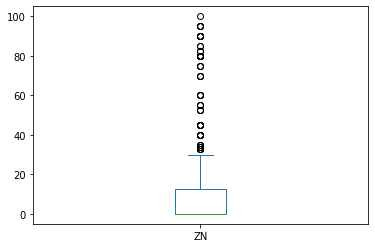

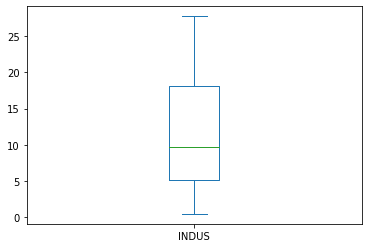

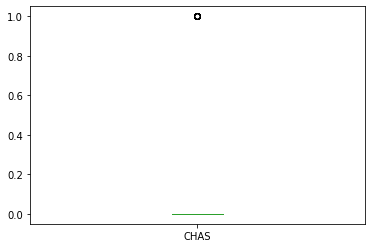

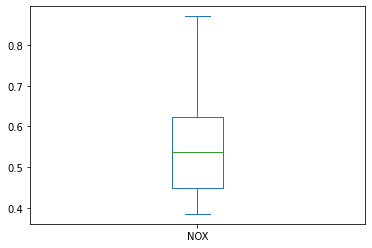

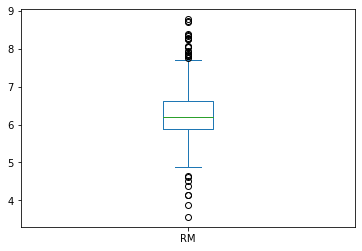

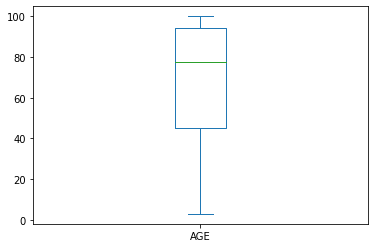

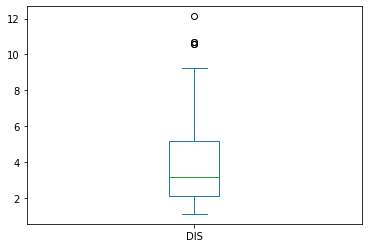

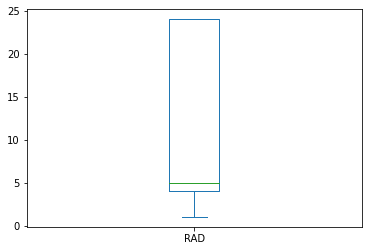

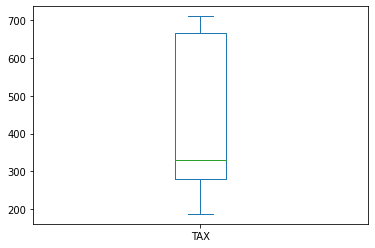

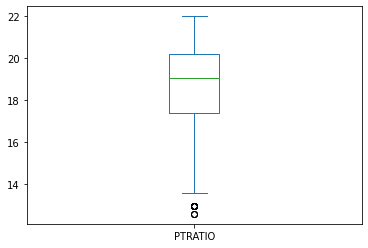

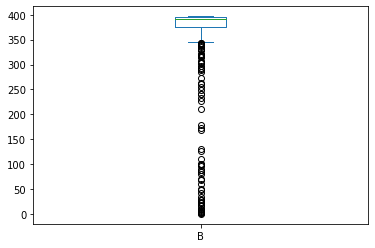

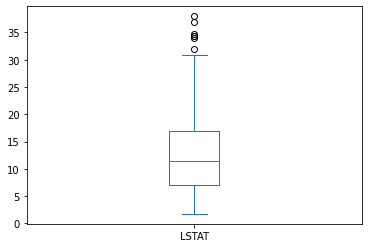

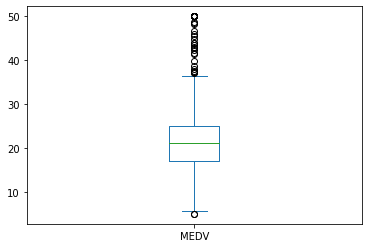

In [17]:
for col in df.columns:
    df[col].plot(kind="box")
    plt.show()

In [18]:
#remove the outliers
def wrangle(filepath):
    df = pd.read_csv(filepath)
#     df = df["CRIM"] < 50
#     df = df["ZN"] < 85
#     df = df["DIS"] < 10
#     df = df["PTRATIO"] > 14
#     df = df["LSTAT"] < 35
    mask_crim = df["CRIM"] < 50
    mask_zn = df["ZN"] < 85
    mask_dis = df["DIS"] < 10
    mask_ptration = df["PTRATIO"] > 14
    mas_lstat = df["LSTAT"] < 35
    df = df[mask_crim & mask_zn & mask_dis & mask_ptration & mas_lstat]
    return df

In [19]:
df = wrangle("/kaggle/input/the-boston-houseprice-data/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [21]:
df.shape

(469, 14)

In [22]:
target = "MEDV"
y = df[target]
X = df.drop(columns = target)

In [23]:
cutt_off = int(len(X) * 0.8)

X_train, y_train = X.iloc[:cutt_off], y.iloc[:cutt_off]
X_test, y_test = X.iloc[cutt_off:], y.iloc[cutt_off:]

In [24]:
#from imputer import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [25]:
model = make_pipeline(
    SimpleImputer(),
    LinearRegression()
)

In [26]:
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

Baseline model

In [27]:
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print(mae_baseline, y_train.mean())

6.159035733333333 23.293066666666665


In [28]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print(mae_training)

3.295671108037871


Test with the test data

In [29]:
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(mae_test)

4.771347665137425


In [30]:
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    23.443203
1    22.224947
2     5.097066
3    12.816480
4    14.061694
dtype: float64

**Let's try with the ridge model**

In [31]:
model1 = make_pipeline(
    SimpleImputer(),
    Ridge()#LinearRegression()
)
model1.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [32]:
y_pred_training = model1.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print(mae_training)

3.2750956351604


In [33]:
y_pred_test = model1.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(mae_test)

4.581357709866138


In [34]:
y_pred_test = pd.Series(model1.predict(X_test))
y_pred_test.head()

0    22.083905
1    20.447231
2     3.078356
3    11.622218
4    12.933892
dtype: float64

In [35]:
def make_prediction(CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT):
    Data = {
        "CRIM": CRIM,
        "ZN": ZN,
        "INDUS": INDUS,
        "CHAS" : CHAS,
        "NOX" : NOX,
        "RM": RM,
        "AGE": AGE,
        "DIS" : DIS,
        "RAD": RAD,
        "TAX": TAX,
        "PTRATIO" : PTRATIO,
        "B": B,
        "LSTAT": LSTAT}
    df = pd.DataFrame(Data, index=[0])
    prediction_lr = model.predict(df).round(2)[0]
    prediction_ridge = model1.predict(df).round(2)[0]
    return f"Predicted house price for lr_model is ${prediction_lr} 1000's [k] & for ridge is ${prediction_ridge} 1000's [k]"

In [36]:
cols = df.columns[:len(df.columns) - 1]
cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [37]:
# def make_predictions(CRIM, ZN, NDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT):
#     for col in (df.columns[:len(df.columns) - 1]):
#         print(col)

In [38]:
#make_predictions(col for col in (df.columns[:len(df.columns) - 1]))

In [39]:
# def make_predictions(CRIM, ZN, NDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT):
#     Data = dict()
#     for key, value in (df.columns[:len(df.columns) - 1]):
#         Data[key] = col.values()
#     return Data

In [40]:
make_prediction(0.00632, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296.0, 15.3, 396.90, 4.98)

"Predicted house price for lr_model is $28.78 1000's [k] & for ridge is $29.26 1000's [k]"

In [41]:
make_prediction(0.04527, 0.0, 11.93, 0, 0.573, 6.120, 76.7, 2.2875, 1, 273.0, 21.0, 396.90, 9.08)

"Predicted house price for lr_model is $22.15 1000's [k] & for ridge is $22.65 1000's [k]"